<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/homeworks/h2/hw_02.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Tarea N°02

## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Nicolás Valdebenito Cortés

* __Rol__: 201710517-8

2.- Debes _subir_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
   - Soluciones
   - Código
   - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from time import time

%matplotlib inline

In [ ]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [ ]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [ ]:
## FIX ME PLEASE

In [ ]:
digits.describe()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [ ]:
digits.isnull().sum()

c00       0
c01       0
c02       0
c03       0
c04       0
         ..
c60       0
c61       0
c62       0
c63       0
target    0
Length: 65, dtype: int64

In [ ]:
digits.dtypes

c00       int64
c01       int64
c02       int64
c03       int64
c04       int64
          ...  
c60       int64
c61       int64
c62       int64
c63       int64
target    int64
Length: 65, dtype: object

In [ ]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int64
 1   c01     1797 non-null   int64
 2   c02     1797 non-null   int64
 3   c03     1797 non-null   int64
 4   c04     1797 non-null   int64
 5   c05     1797 non-null   int64
 6   c06     1797 non-null   int64
 7   c07     1797 non-null   int64
 8   c08     1797 non-null   int64
 9   c09     1797 non-null   int64
 10  c10     1797 non-null   int64
 11  c11     1797 non-null   int64
 12  c12     1797 non-null   int64
 13  c13     1797 non-null   int64
 14  c14     1797 non-null   int64
 15  c15     1797 non-null   int64
 16  c16     1797 non-null   int64
 17  c17     1797 non-null   int64
 18  c18     1797 non-null   int64
 19  c19     1797 non-null   int64
 20  c20     1797 non-null   int64
 21  c21     1797 non-null   int64
 22  c22     1797 non-null   int64
 23  c23     1797 

In [ ]:
for i in digits['target'].unique():
    count = len(digits[digits['target']==i]['target'])
    print("Hay",count,"registros de la clase",i)

Hay 178 registros de la clase 0
Hay 182 registros de la clase 1
Hay 177 registros de la clase 2
Hay 183 registros de la clase 3
Hay 181 registros de la clase 4
Hay 182 registros de la clase 5
Hay 181 registros de la clase 6
Hay 179 registros de la clase 7
Hay 174 registros de la clase 8
Hay 180 registros de la clase 9


[]

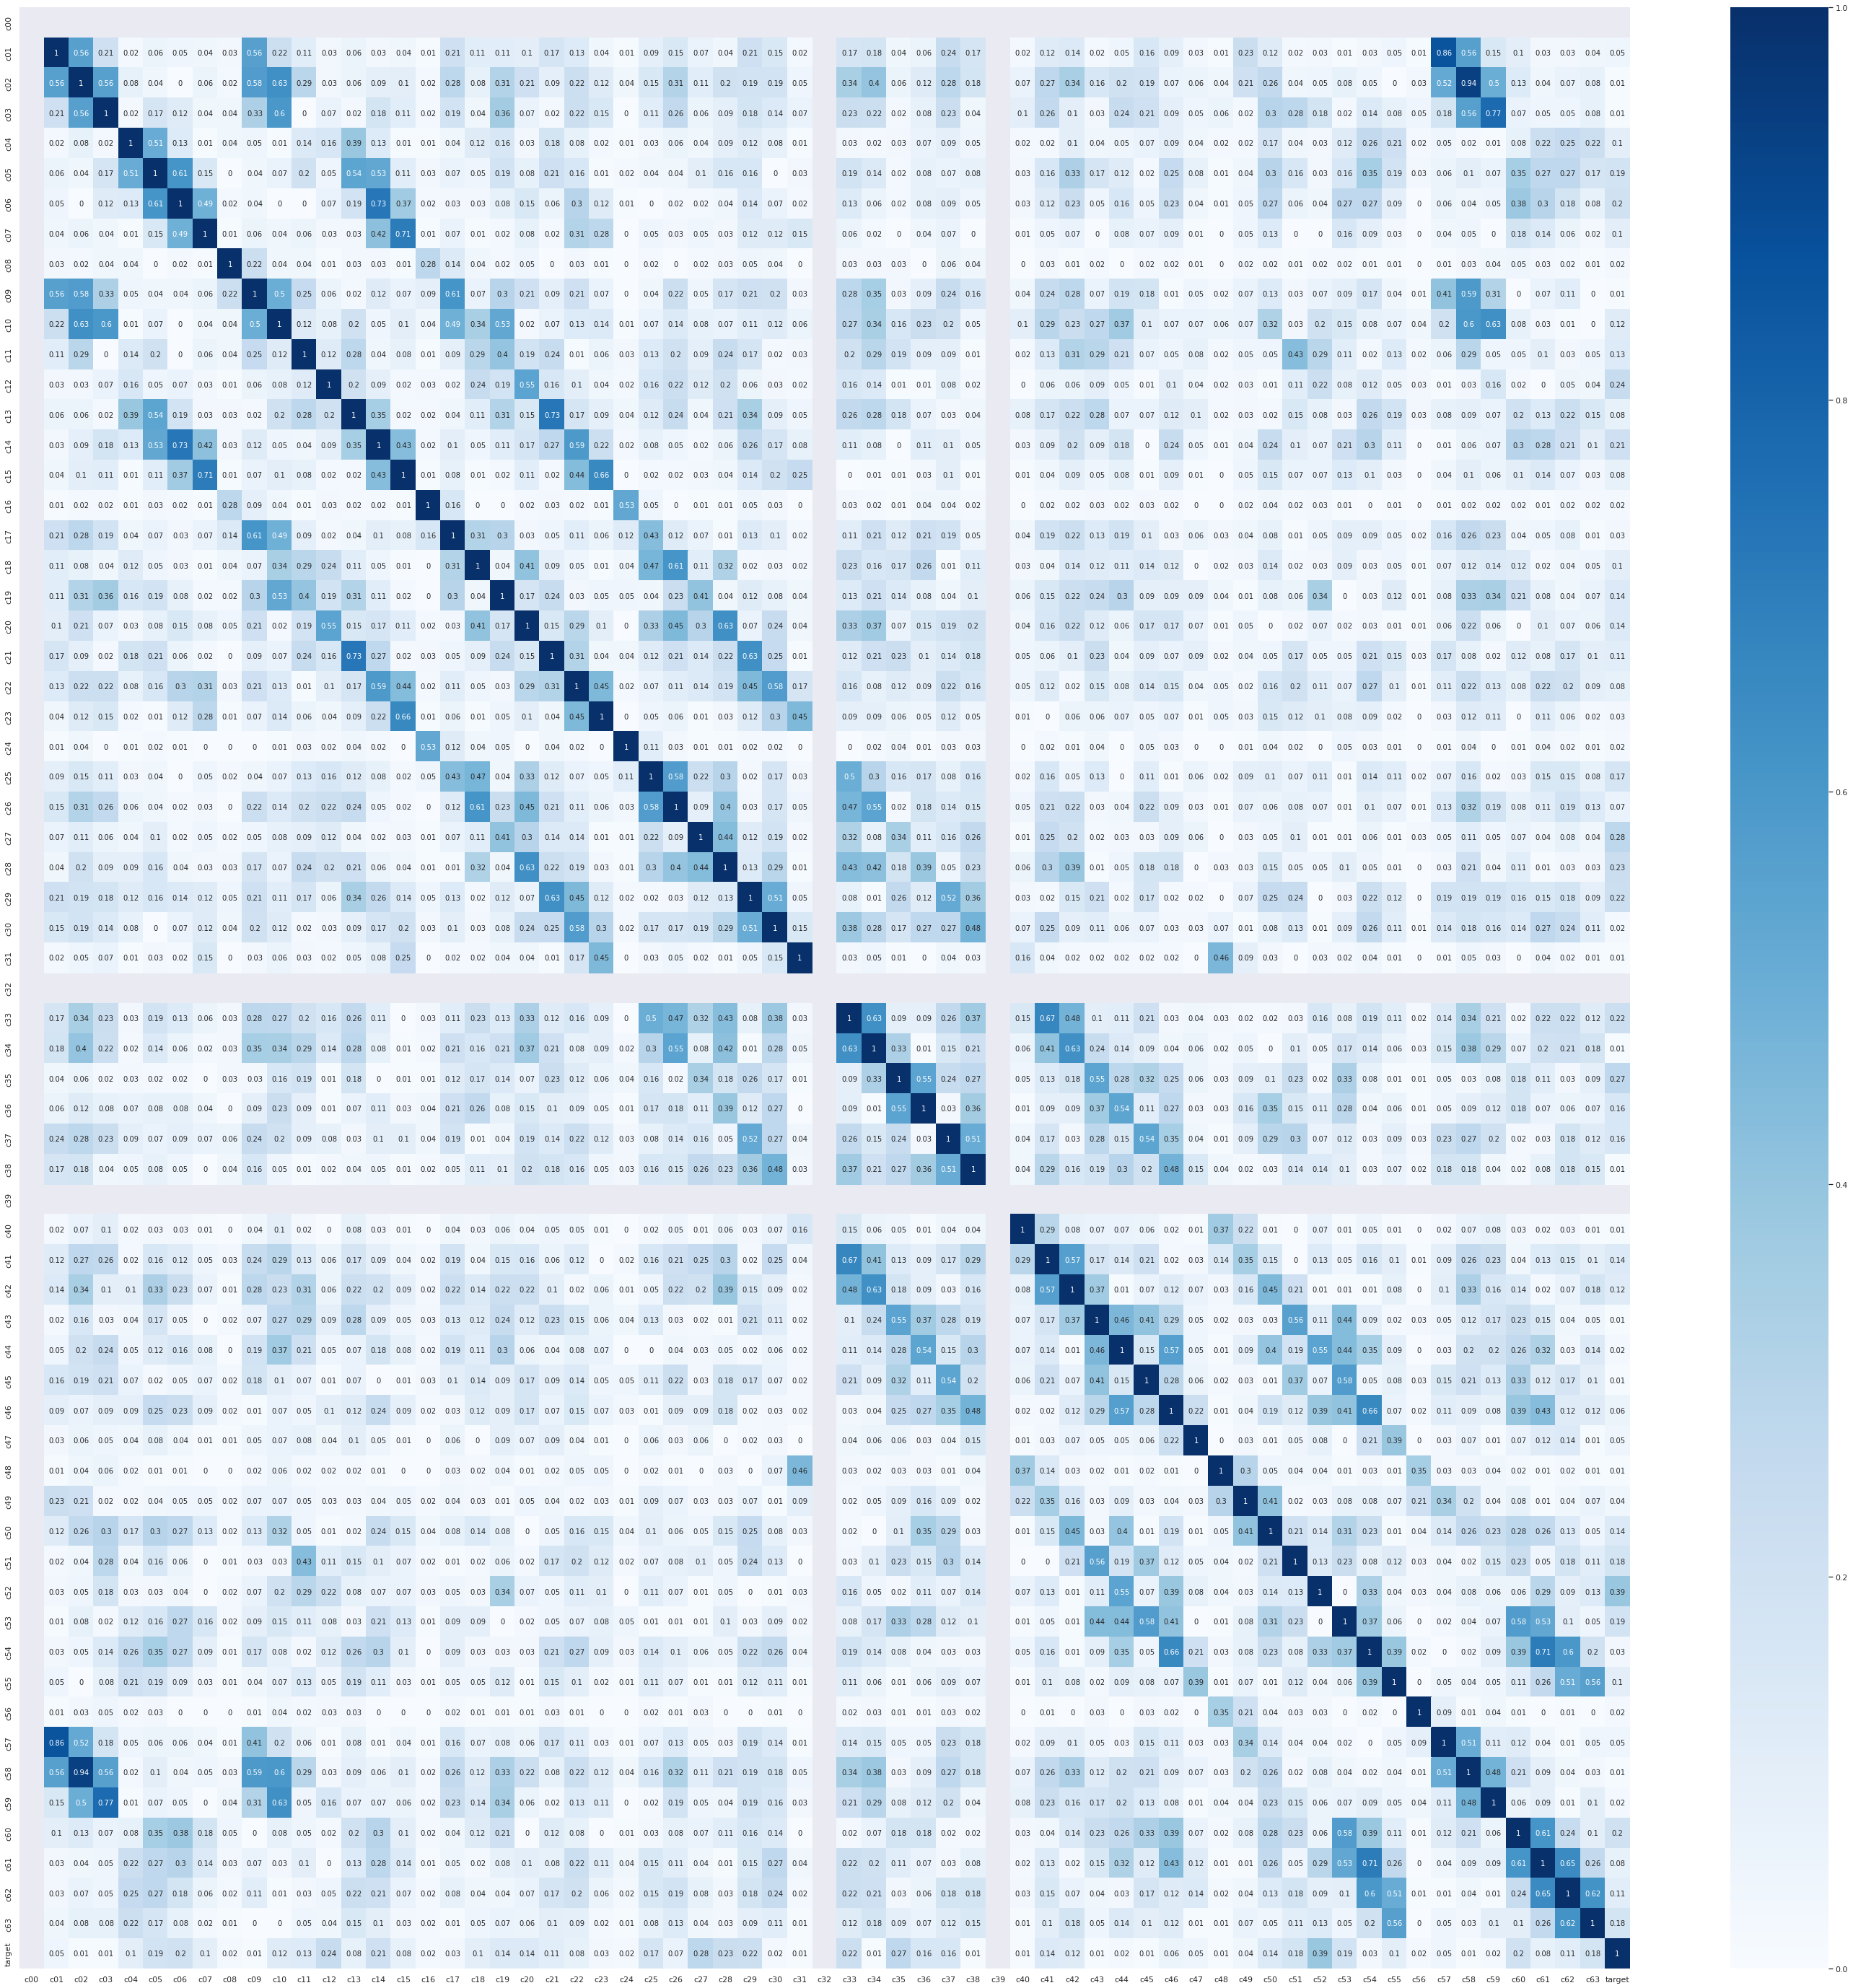

In [ ]:
fig = plt.figure(figsize=(50,50))
sns.heatmap(data=digits[digits.columns].corr().round(2).abs(), annot=True, cmap=plt.cm.Blues)
plt.plot()

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [ ]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

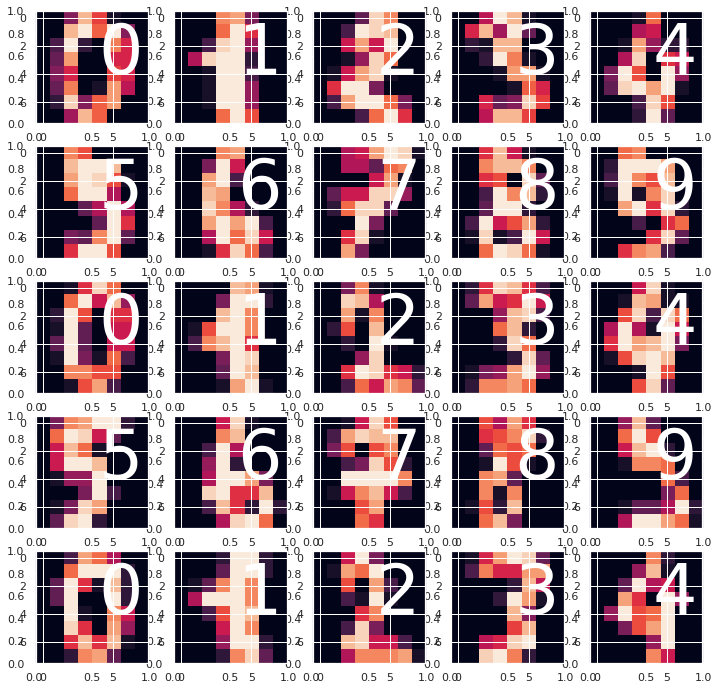

In [ ]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))

## FIX ME PLEASE

n=0
for i in range(1,26):
    etiqueta=['0','1','2','3','4','5','6','7','8','9']
    fig.add_subplot(nx,ny,i)
    plt.imshow(digits_dict["images"][i-1])
    plt.text(4,4,etiqueta[n],fontsize=70,color='white')
    n+=1
    if n==(len(etiqueta)):
        n=0
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [ ]:
X = digits.drop(columns="target").values
y = digits["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('Cantidad de datos de entrenamiento:',len(X_train),'\nCantidad de datos de testeo:', len(X_test))

Cantidad de datos de entrenamiento: 1347 
Cantidad de datos de testeo: 450


In [ ]:
X.shape, y.shape

((1797, 64), (1797,))

In [ ]:
# Modelo KNN o Vecino más Cercano

param_grid = {'n_neighbors':[1, 5, 10], 'weights':['uniform', 'distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']} 
knn = KNeighborsClassifier()
gs = GridSearchCV(knn, param_grid)
gs.fit(X_train, y_train)
print("Best: %f con %s" % (gs.best_score_, gs.best_params_))

Best: 0.986636 con {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


In [ ]:
# Modelo Regresión Logística

param_grid= {'solver': ['liblinear', 'newton-cg', 'lbfgs'],
             'C': [1, 0.5, 0.25]}

 
rlog = LogisticRegression(random_state=42)
gs = GridSearchCV(rlog, param_grid)
gs.fit(X_train, y_train)

print("Best: %f con %s" % (gs.best_score_, gs.best_params_))

Best: 0.953956 con {'C': 0.25, 'solver': 'lbfgs'}


In [ ]:
# Modelo Random Forest Classifier

param_grid = {'max_depth': [3, 5, 10],
              'n_estimators': [10, 50, 100]}

 
rfc = RandomForestClassifier(random_state=42)
gs = GridSearchCV(rfc, param_grid)
gs.fit(X_train, y_train)

print("Best: %f con %s" % (gs.best_score_, gs.best_params_))

Best: 0.968074 con {'max_depth': 10, 'n_estimators': 100}


In [ ]:
# Modelo Suport Vector Classifier

param_grid = {'kernel':('linear', 'rbf'),
              'C': [1,2,3,4,5,6,7,8,9,10]}

svc = SVC()

svc.fit(X_train, y_train)

print("Best: %f con %s" % (gs.best_score_, gs.best_params_))

Best: 0.968074 con {'max_depth': 10, 'n_estimators': 100}


In [ ]:
ti=time()
knn.fit(X_train, y_train)
tf=time()
tp=tf-ti
print("el tiempo de ejecucion de knn es de", tp, "segundos")


ti=time()
rlog.fit(X_train, y_train)
tf=time()
tp=tf-ti
print("el tiempo de ejecucion de rlog es de", tp, "segundos")


ti=time()
rfc.fit(X_train, y_train)
tf=time()
tp=tf-ti
print("el tiempo de ejecucion de rfc es de", tp, "segundos")


ti=time()
svc = SVC()
svc.fit(X_train, y_train)
tf=time()
tp=tf-ti
print("el tiempo de ejecucion de svc es de", tp, "segundos")

el tiempo de ejecucion de knn es de 0.0021505355834960938 segundos
el tiempo de ejecucion de rlog es de 0.2053687572479248 segundos
el tiempo de ejecucion de rfc es de 0.35167956352233887 segundos
el tiempo de ejecucion de svc es de 0.05961012840270996 segundos


A continuación se mostrará un modelo de redes neuronales feed forward

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# One-Hot-Encodinig
y1 = np.zeros((y.size, y.max()+1))
y1[np.arange(y.size),y] = 1

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.35, stratify=y1, random_state=1234)

# Scaler
scaler = StandardScaler().fit(X_train)
X_train, X_test = [scaler.transform(x) for x in [X_train, X_test]]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 64), (629, 64), (1168, 10), (629, 10))

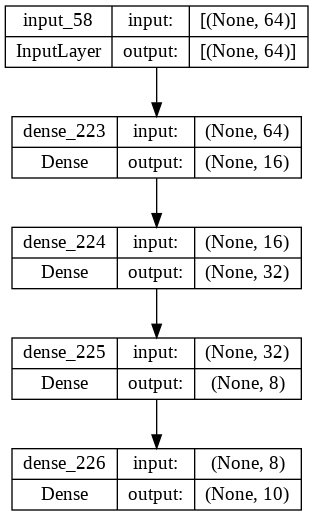

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense 
import matplotlib.gridspec as gridspec

def NN(seed=1234, reg=None):
  tf.random.set_seed(seed)
  inputs  = keras.Input(shape=(X.shape[1],))
  hidden  = Dense(16, activation="relu", activity_regularizer=reg)(inputs)
  hidden  = Dense(32, activation="relu", activity_regularizer=reg)(hidden)
  hidden  = Dense(8, activation="relu", activity_regularizer=reg)(hidden)
  outputs = Dense(10, activation='softmax')(hidden)
  return keras.Model(inputs, outputs)

keras.utils.plot_model(NN(seed=1234), show_shapes=True)

In [ ]:
model = NN(reg=None)
model.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
from keras.callbacks import History,EarlyStopping
my_callbacks = [History(), EarlyStopping(patience=10, monitor="val_loss",restore_best_weights=True)] 

20/20 [==============================] - 0s 2ms/step - loss: 0.0451 - acc: 0.9380


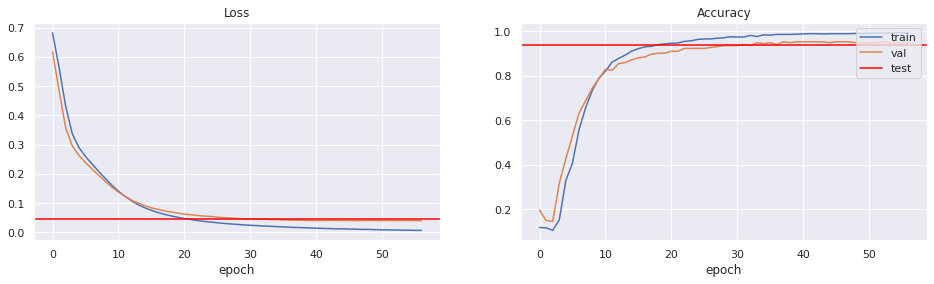

In [ ]:
model = NN(reg=None)
model.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['acc'])
hist = model.fit(X_train, y_train, epochs=60, verbose=0, validation_split=0.2, callbacks=my_callbacks) 
test = model.evaluate(X_test, y_test)

fig = plt.figure(figsize=(16,4))
gs = gridspec.GridSpec(1, 2)

ax = plt.subplot(gs[0, 0])
ax.plot(hist.history['loss'], label='train')
ax.plot(hist.history['val_loss'], label='val')
ax.axhline(test[0], color='red', label='test')
ax.set_title('Loss')
ax.set_xlabel('epoch')

ax = plt.subplot(gs[0, 1])
ax.plot(hist.history['acc'], label='train')
ax.plot(hist.history['val_acc'], label='val')
ax.axhline(test[1], color='red', label='test')
ax.set_title('Accuracy')
ax.set_xlabel('epoch')
ax.legend(loc=1)
plt.show()

Conclusión: Todos los modelos tienen un rendimiento por sobre el 90%, así que se elige el modelo KNN ya que fue el cual menos tiempo tomó en ejecutarse.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [ ]:
## FIX ME PLEASE

In [ ]:
#Cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)

print(scores)
#Podemos ver que en la 9na iteración saca 100% de accuracy.
m=scores.mean()
#La media es un accuracy de 98%
s=scores.std()*2
#Tendremos que el error será:
print('El intervalo de confianza es:\n', m ,"±",s)

[0.95726496 0.97435897 0.96581197 0.95726496 0.98290598 0.96581197
 0.94017094 0.98290598 0.99137931 0.93965517]
El intervalo de confianza es:
 0.9657530209254347 ± 0.03345958340680891


In [ ]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.array([i for i in range (1,10)])
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(algorithm = 'kd_tree', metric= 'euclidean', n_neighbors=3, weights='uniform').fit(X_train, y_train),
    X_train,
    y_train,
    param_name="n_neighbors",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.85, 1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score


# Binarize the output
ry = label_binarize(y, classes=digits["target"].unique())
n_classes = y_test.shape[0]

n_samples, n_features = X.shape

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, ry,
                                                    test_size=0.3,
                                                    train_size = 0.7)
                                                    

# Learn to predict each class against the other
classifier = OneVsRestClassifier(KNeighborsClassifier())
y_score = classifier.fit(X_train, y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[i], y_score[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

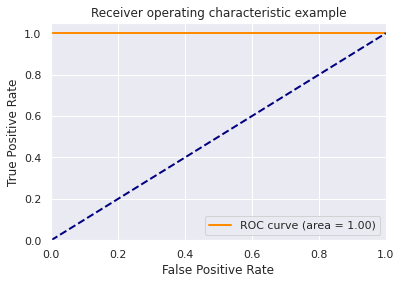

In [ ]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


In [ ]:
## FIX ME PLEASE

### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [ ]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    
    X = digits.drop(columns="target").values
    Y = digits["target"].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    Y_pred = list(model.predict(X_test))

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = Y_pred == Y_test
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = Y_pred != Y_test
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = np.array(Y_test)[mask]
    y_aux_pred = np.array(Y_pred)[mask]

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
            ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

In [ ]:
## FIX ME PLEASE

In [ ]:
scv=SVC(C=7, kernel='rbf')

IndexError: ignored

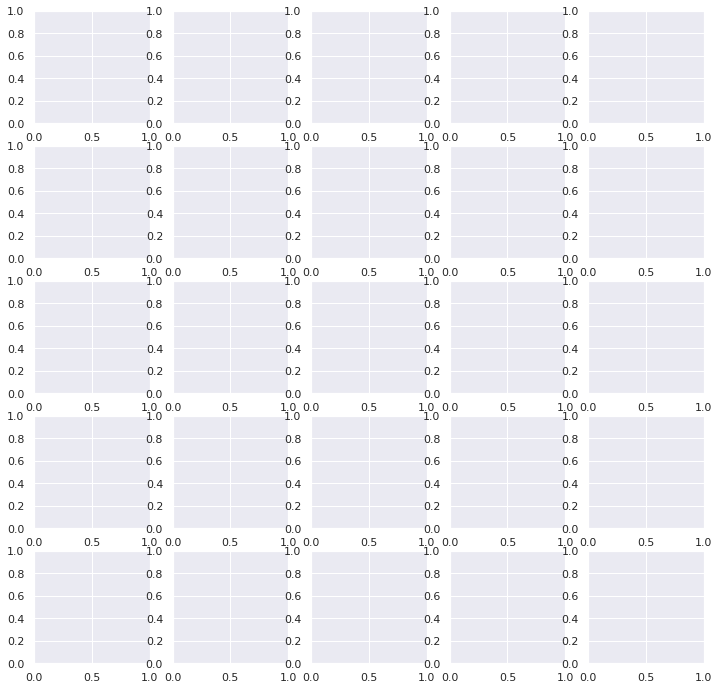

In [ ]:
mostar_resultados(digits,svc,nx=5, ny=5,label = "correctos")

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

En sí, es un problema que ya he atacado con anterioridad, por lo que no tuve inconvenientes con el mismo. No obstante, podemos notar que los modelos de clasificación usados en un principio, como KNN, funcionan mucho mejor que modelos más avanzados, como las redes neuronales feed forward. Esto se debe a la simplicidad del problema, a mi parecer. Una de las características que lo hace simple es, por ejemplo, la resolución de las imágenes de nuestro dataset.

## II.- California Housing Prices


<img src="https://www.wartsila.com/images/default-source/default-album/california_housing.tmb-1920x690.jpg?sfvrsn=126bc44_1" width="480" height="240" align="center"/>

Los datos se refieren a las casas encontradas en un distrito determinado de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Tenga en cuenta que los datos no se limpian, por lo que se requieren algunos pasos de procesamiento previo.

Las columnas son las siguientes, sus nombres se explican por sí mismos:

* longitude
* latitude
* housingmedianage
* total_rooms
* total_bedrooms
* population
* households
* median_income
* medianhousevalue
* ocean_proximity


El objetivo es poder predecir el valor promedio de cada propiedad. 
Para poder completar correctamente este laboratorio, es necesario seguir la siguiente rúbrica de trabajo:

1. Definición del problema
2. Estadística descriptiva
3. Visualización descriptiva
4. Preprocesamiento
5. Selección de modelo 
    1. Por lo menos debe comparar cuatro modelos
    2. Al menos tres de estos modelos tienen que tener hiperparámetros.
    3. Realizar optimización de hiperparámetros.
6. Métricas y análisis de resultados
7. Visualizaciones del modelo
8. Conclusiones

> **Observación**: Puede tomar como referencia lo realizado en la sección **I.- Clasificación de dígitos**. El alumno tiene la libertad de desarrollar un análisis más completo del problema (si así lo desea). Puede tomar como referencia el siguiente [link](https://www.kaggle.com/camnugent/california-housing-prices).

In [ ]:
# read data
housing = pd.read_csv('housing.csv',sep=',')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
## FIX ME PLEASE

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [ ]:
#Cambiamos a valor numerico el ocean proximity
housing['ocean_proximity'] = housing['ocean_proximity'].replace(['NEAR BAY','<1H OCEAN','INLAND','NEAR OCEAN','ISLAND'],[3,2,4,1,0])

housing['ocean_proximity'].unique()

array([3, 2, 4, 1, 0])

In [ ]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
#cambiamos los valores nulos por el promedio
housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean(), inplace=True)
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


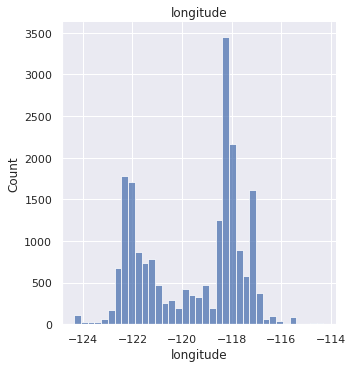

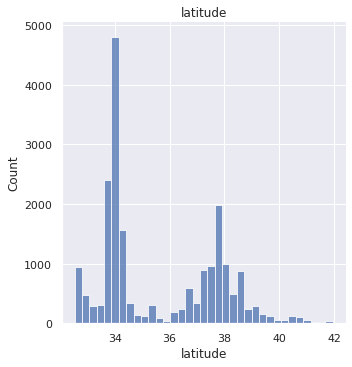

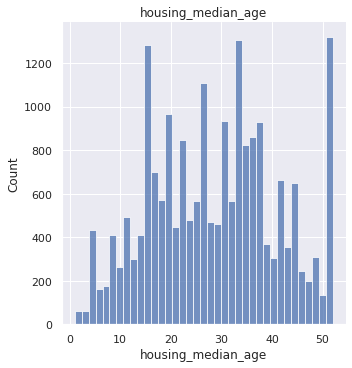

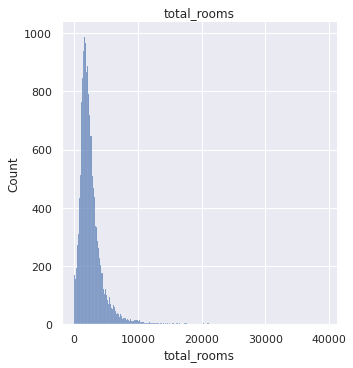

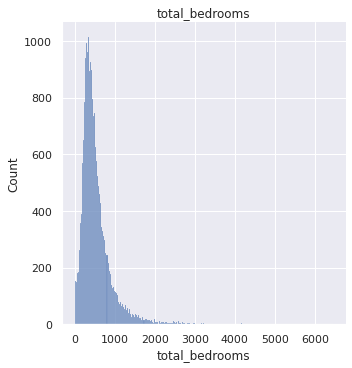

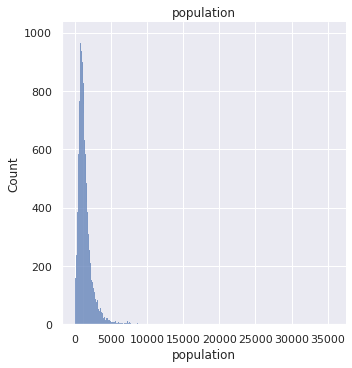

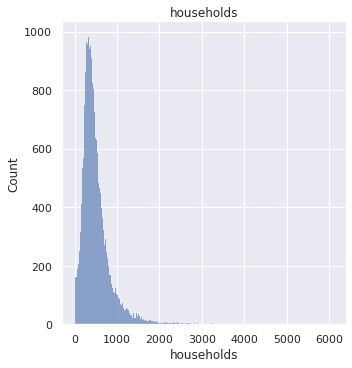

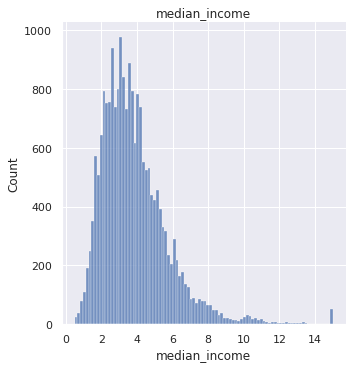

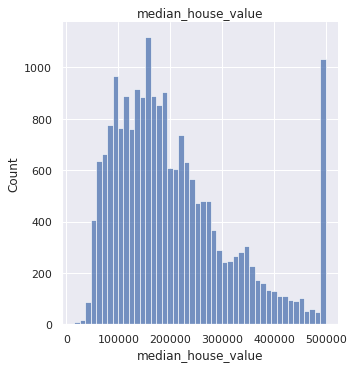

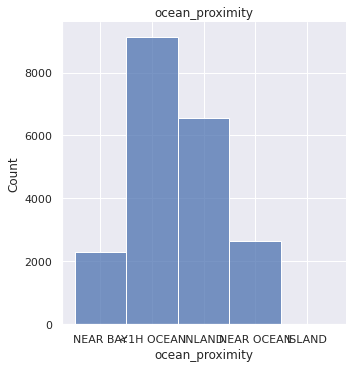

In [ ]:
for i in range(10):
    sns.displot(housing[housing.columns[i]])
    plt.title(housing.columns[i])

In [ ]:
X = housing.drop(columns="median_house_value").values
y = housing["median_house_value"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)
print('Cantidad de datos de entrenamiento:',len(X_train),'\nCantidad de datos de testeo:', len(X_test))

Cantidad de datos de entrenamiento: 15480 
Cantidad de datos de testeo: 5160


In [ ]:
param_grid = {'n_neighbors':[1, 5, 10], 'weights':['uniform', 'distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']} 
knn = KNeighborsClassifier()
gs = GridSearchCV(knn, param_grid)
gs.fit(X_train, y_train)
print("Best: %f con %s" % (gs.best_score_, gs.best_params_))

Best: 0.028101 con {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}


In [ ]:
param_grid= {'solver': ['liblinear', 'newton-cg', 'lbfgs'],
             'C': [1, 0.5, 0.25]}

 
rlog = LogisticRegression(random_state=42)
gs = GridSearchCV(rlog, param_grid)
gs.fit(X_train, y_train)

print("Best: %f con %s" % (gs.best_score_, gs.best_params_))

In [ ]:
param_grid = {'max_depth': [3, 5, 10],
              'n_estimators': [10, 50, 100]}

 
rfc = RandomForestClassifier(random_state=42)
gs = GridSearchCV(rfc, param_grid)
gs.fit(X_train, y_train)

print("Best: %f con %s" % (gs.best_score_, gs.best_params_))

In [ ]:
param_grid = {'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 10]}


dtc = DecisionTreeClassifier(random_state=42)

gs = GridSearchCV(dtc, param_grid)

gs.fit(X_train, y_train)

print("Best: %f con %s" % (gs.best_score_, gs.best_params_))

In [ ]:
def NN(seed=1234, reg=None):
  tf.random.set_seed(seed)
  inputs  = keras.Input(shape=(X.shape[1],))
  hidden  = Dense(16, activation="relu", activity_regularizer=reg)(inputs)
  hidden  = Dense(32, activation="relu", activity_regularizer=reg)(hidden)
  hidden  = Dense(8, activation="relu", activity_regularizer=reg)(hidden)
  outputs = Dense(1, activation='softmax')(hidden)
  return keras.Model(inputs, outputs)

keras.utils.plot_model(NN(seed=1234), show_shapes=True)

In [ ]:
def MSEFuntion(y_true, y_pred):
  return tf.math.reduce_mean(tf.math.pow(y_pred-y_true,2))

model1  = NN()
model1.compile(loss=MSEFuntion, optimizer='rmsprop', metrics=['mae'])
history1 = model1.fit(X_train, y_train, epochs=50, verbose=2)
test1 = model1.evaluate(X_test, y_test)

In [ ]:
model = NN(reg=None)
model.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
from keras.callbacks import History,EarlyStopping
my_callbacks = [History(), EarlyStopping(patience=10, monitor="val_loss",restore_best_weights=True)] 

In [ ]:
model = NN(reg=None)
model.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['acc'])
hist = model.fit(X_train, y_train, epochs=60, verbose=0, validation_split=0.2, callbacks=my_callbacks) 
test = model.evaluate(X_test, y_test)

fig = plt.figure(figsize=(16,4))
gs = gridspec.GridSpec(1, 2)

ax = plt.subplot(gs[0, 0])
ax.plot(hist.history['loss'], label='train')
ax.plot(hist.history['val_loss'], label='val')
ax.axhline(test[0], color='red', label='test')
ax.set_title('Loss')
ax.set_xlabel('epoch')

ax = plt.subplot(gs[0, 1])
ax.plot(hist.history['acc'], label='train')
ax.plot(hist.history['val_acc'], label='val')
ax.axhline(test[1], color='red', label='test')
ax.set_title('Accuracy')
ax.set_xlabel('epoch')
ax.legend(loc=1)
plt.show()